In [1]:
!pip install wandb
import wandb
from wandb.keras import WandbCallback

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 180 kB 54.0 MB/s 
     |████████████████████████████████| 139 kB 59.1 MB/s 
     |████████████████████████████████| 97 kB 4.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=7627c3ac8691d90851517cf8091e7c31214b57888472eecd83a79415f3b63374
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=16c01c0b3c6b277f2773deea5d44f30bd2523af0529384522edce1f5ff316202
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [4]:
# Mount google drive where dataset is stored at
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import necessary libraries
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from IPython.display import Image, display
from random import randint

import cv2
import tensorflow as tf
import os
import numpy as np
import pandas as pd

In [6]:
# Configuration settings 
configs = {
    'epochs': 20,
    'batch_size': 32, 
    'seed': 7,
    'learning_rate': 1e-3, #0.001
    'hidden_activation': 'relu',
    'output_activation': 'sigmoid',
    'optimizer': 'adam',
    'loss_function': 'binary_crossentropy',
    'metrics': ['accuracy'],
    'fc_layer_1_neurons' : 1024,
    'fc_layer_2_neurons' : 512,
    'fc_layer_3_neurons' : 256,
}

# Initialise Wandb
demo = wandb.init(
    #name='demo_resnet50V2_with_pretrained_celebA',
    #project='CZ4042_Assignment_2_Resnet_Experiments',
    config= configs,
)

config = wandb.config
np.random.seed(config.seed)
tf.random.set_seed(config.seed)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [7]:
# Creating the resnet50V2 model
def get_resnet50V2_model():

  seq = tf.keras.models.Sequential()

  seq.add(ResNet50V2(include_top=False, pooling = 'avg', weights ='imagenet', input_shape=(224,224,3)))

  seq.add(Flatten())

  seq.add(BatchNormalization())

  seq.add(Dense(config.fc_layer_1_neurons, activation = config.hidden_activation))

  seq.add(tf.keras.layers.Dropout(0.5))

  seq.add(BatchNormalization())

  seq.add(Dense(config.fc_layer_2_neurons, activation = config.hidden_activation))

  seq.add(tf.keras.layers.Dropout(0.5))

  seq.add(BatchNormalization())

  seq.add(Dense(config.fc_layer_3_neurons, activation = config.hidden_activation))

  seq.add(tf.keras.layers.Dropout(0.5))

  seq.add(BatchNormalization())

  seq.add(Dense(1, activation= config.output_activation))
  
  seq.layers[0].trainable = True

  return seq

In [8]:
model = get_resnet50V2_model()

# Load the pretrained weights
model.load_weights('/content/drive/MyDrive/CZ4042 Project Assignment 2/Models/Saved Models and Weights/my_resnet50V2_with_pretrained_celebA_model.h5')

# View summary of model
model.summary()

94674944/94668760 [==============================] - 1s 0us/step


OSError: ignored

In [ ]:
# Define the google drive path where data is stored
base_path = '/content/drive/MyDrive/CZ4042 Project Assignment 2/Models/Demo/Demo Pictures'
faces = []

# Loop through each image and append their string name to a list
for filename in sorted(os.listdir(base_path)):
  if filename.endswith("jpg"):  
        faces.append(filename)

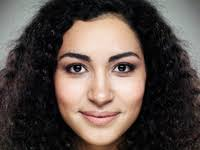

Predicted: Class 0, Female




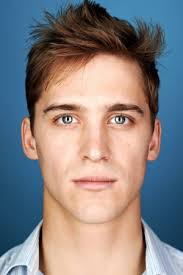

Predicted: Class 1, Male




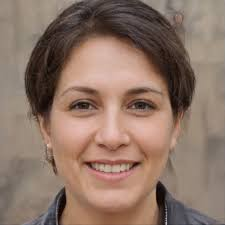

Predicted: Class 0, Female




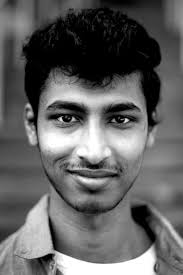

Predicted: Class 1, Male




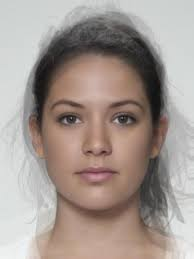

Predicted: Class 0, Female




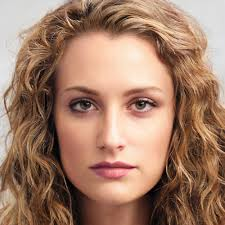

Predicted: Class 0, Female




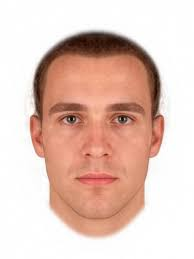

Predicted: Class 1, Male




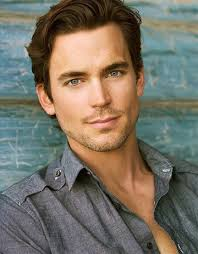

Predicted: Class 1, Male




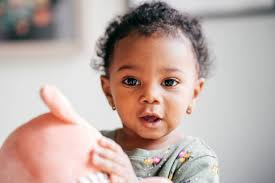

Predicted: Class 0, Female




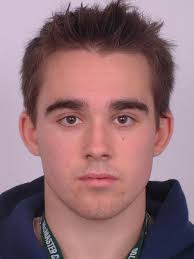

Predicted: Class 1, Male




In [ ]:
# Performing the classification on the demo images
img_width, img_height = 224, 224

# Shows faces in demo pictures alongside their gender classification using our trained ResnetV2 model
for i in range(len(faces)):
  display(Image(filename=base_path + "/" + faces[i], width = 125, height = 125))
  img = image.load_img('/content/drive/MyDrive/CZ4042 Project Assignment 2/Models/Demo/Demo Pictures/' + faces[i], target_size = (img_width, img_height))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  img_preprocessed = preprocess_input(img)

  prediction = (model.predict(img) > 0.5).astype("int32")
  genderLabel = ""

  if(prediction[0][0] > 0.5):
    genderLabel = "Class 1, Male"
  else:
    genderLabel = "Class 0, Female"

  print("Predicted:", genderLabel)
  print("\n")